In [ ]:
0 - unexplored
1 - Hit
-1 - Miss
2 - Sunk

0 - nothing
1 - ship

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [ ]:
n = 10
k = 10000

In [ ]:
board = np.zeros((n,n))
board.shape

(10, 10)

In [ ]:
map = np.zeros((n,n))
map.shape

(10, 10)

In [ ]:
ships = {0:2, 1:2, 2:3, 3:4}
ship_list = dict()

In [ ]:
def check_valid_pc(x,y,ori,ship,board_state):
  """ori : Left, Down, Right, Up"""
  st = True
  if ori==0:
    st = st and x-ship >=0
  if ori==3:
    st = st and  y-ship >=0
  if ori==1:
    st = st and  y+ship < board_state.shape[0]
  if ori==2:
    st = st and  x+ship < board_state.shape[0]
  for i in range(ship):
    if ori==0:
      st = st and not board_state[x-i,y]
    if ori==3:
      st = st and not board_state[x,y-i]
    if ori==1:
      st = st and not board_state[x,y+i]
    if ori==2:
      st = st and not board_state[x+i,y]
  return st
def check_valid_player(x,y,ori,ship,board_state):
  """ori : Left, Down, Right, Up"""
  st = True
  if ori==0:
    st = st and x-ship >=0
  if ori==3:
    st = st and  y-ship >=0
  if ori==1:
    st = st and  y+ship < board_state.shape[0]
  if ori==2:
    st = st and  x+ship < board_state.shape[0]
  for i in range(ship):
    if ori==0:
      st = st and board_state[x-i,y]==0
    if ori==3:
      st = st and board_state[x,y-i]==0
    if ori==1:
      st = st and board_state[x,y+i]==0
    if ori==2:
      st = st and board_state[x+i,y]==0
  return st
def place_ship(x,y,ori,ind,ship,board_state,ship_list):
  for i in range(ship):
    if ori==0:
      board_state[x-i,y] = 1
      ship_list[(x-i,y)] = ind
    if ori==3:
      board_state[x,y-i] = 1
      ship_list[(x,y-i)] = ind
    if ori==1:
      board_state[x,y+i] = 1
      ship_list[(x,y+i)] = ind
    if ori==2:
      board_state[x+i,y] = 1
      ship_list[(x+i,y)] = ind
  return board_state, ship_list
def generate_board_pc(board_state, ships):
  ship_list = dict()
  ship_list[(-1,-1)] = ships
  for ind,ship in ships.items():
    ori = int(np.random.rand(1)*4)
    x,y = int(np.random.rand(1)*board_state.shape[0]),  int(np.random.rand(1)*board_state.shape[0])
    x,y = 0,0
    while not check_valid_pc(x,y,ori,ship,board_state):
      x,y = int(np.random.rand(1)*board_state.shape[0]),  int(np.random.rand(1)*board_state.shape[0])
    board_state,ship_list = place_ship(x,y,ori,ind,ship,board_state,ship_list)
  return board_state,ship_list

def generate_board_player(board_state_prev, ships):
  board_state = np.zeros((n,n))
  ship_list = dict()
  for ind,ship in ships.items():
    ori = int(np.random.rand(1)*4)
    sel = []
    for i in range(board_state.shape[0]):
      for j in range(board_state.shape[0]):
        if board_state[i,j]==0:
          sel.append((i,j))
    xc = int(np.random.rand(1)*len(sel))
    x,y = sel[xc]
    #x,y = int(np.random.rand(1)*board_state.shape[0]),  int(np.random.rand(1)*board_state.shape[0])
    while not check_valid_player(x,y,ori,ship,board_state_prev) or not check_valid_pc(x,y,ori,ship,board_state):
      xc = int(np.random.rand(1)*len(sel))
      x,y = sel[xc]
      #x,y = int(np.random.rand(1)*board_state.shape[0]),  int(np.random.rand(1)*board_state.shape[0])
    board_state,ship_list = place_ship(x,y,ori,ind,ship,board_state,ship_list)
  return board_state

In [ ]:
board_state,ship_list = generate_board_pc(copy.copy(board),ships)
board_state.shape

(10, 10)

In [ ]:
board_state

array([[1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 1., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

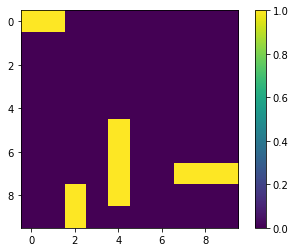

In [ ]:
fig = plt.figure()
plt.imshow(board_state)
plt.colorbar()
plt.show()
fig.savefig("board.png")

In [ ]:
map = np.zeros((n,n))
for i in range(k):
  map+= generate_board_player(copy.copy(board),ships)
map/= k
map.shape

In [ ]:
map

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

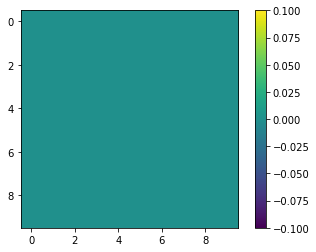

In [ ]:
fig = plt.figure()
plt.imshow(map)
plt.colorbar()
plt.show()
fig.savefig("prob_map.png")

In [ ]:
def alg0(board_state):
  map = np.random.randn(n,n)
  x,y = np.unravel_index(map.argmax(), map.shape)
  while board_state[x,y] !=0:
    map = np.random.randn(n,n)
    x,y = np.unravel_index(map.argmax(), map.shape)
  return map
def alg1(board_state):
  map = np.zeros((n,n))
  tries = np.sum(board_state!=0)
  x,y = np.unravel_index(map.argmax(), map.shape)
  while board_state[x,y] !=0:
    map = np.random.randn(n,n)
    x,y = np.unravel_index(map.argmax(), map.shape)
  if tries<10:
    for i in range(int(k/(tries+1))):
      map+= generate_board_player(copy.copy(board_state),ships)
    return map/k
  return map
def alg2(board_state):
  map = np.zeros((n,n))
  tries = np.sum(board_state!=0)

  sel = []
  for i in range(n):
    for j in range(n):
      if board_state[i,j]==1:
        if i-1>=0 and board_state[i-1,j]==0:
          sel.append((i-1,j))
        if j-1>=0 and board_state[i,j-1]==0:
          sel.append((i,j-1))
        if i+1<n and board_state[i+1,j]==0:
          sel.append((i+1,j))
        if j+1<n and board_state[i,j+1]==0:
          sel.append((i,j+1))
  id = int(np.random.rand(1)*len(sel))
  if len(sel)>0:
    map[sel[id][0], sel[id][1]] = 1
    return map

  if False: #tries<10:
    for i in range(int(k/(tries+1))):
      map+= generate_board_player(copy.copy(board_state),ships)
    return map/k
  else:
    map = np.random.randn(n,n)
    x,y = np.unravel_index(map.argmax(), map.shape)
    while board_state[x,y] !=0:
      map = np.random.randn(n,n)
      x,y = np.unravel_index(map.argmax(), map.shape)
    return map

def alg3(board_state):
  map = np.zeros((n,n))
  tries = np.sum(board_state!=0)
  return map

In [ ]:
def take_action(board,board_state,ship_list,x,y):
  if board[x,y]==1:
    board[x,y] = 0
    board_state[x,y] = 1
    #ind = ship_list[(x,y)]
    #ship_list[(-1,-1)][ind] = ship_list[(-1,-1)][ind]-1
    #if ship_list[(-1,-1)][ind] == 0:
    #  for cd,vl in ship_list.items():
    #    if vl==ind:
    #      board_state[cd[0],cd[1]] = 2
  else:
    board_state[x,y] = -1
  return board,board_state,ship_list

In [ ]:
def play(alg):
  board, ship_list = generate_board_pc(copy.copy(np.zeros((n,n))),copy.copy(ships))
  #plt.imshow(board)
  #plt.colorbar()
  #plt.show()
  board_state = copy.copy(np.zeros((n,n)))
  i = 0
  while np.sum(board)>0:
    map = alg(board_state)
    x,y = np.unravel_index(map.argmax(), map.shape)
    board,board_state,ship_list = take_action(board,board_state,ship_list,x,y)
    #print(x,y)
    #print(i)
    #plt.imshow(map)
    #plt.colorbar()
    #plt.show()
    i=i+1
  #plt.imshow(board)
  #plt.colorbar()
  #plt.show()
  #plt.imshow(board_state)
  #plt.colorbar()
  #plt.show()
  return i

In [ ]:
n = 40

In [ ]:
a = []
for i in range(1,1000):
  if (i+1)%100==0:
    print(np.sum(a)/i)
  a.append(play(alg0))
print(np.sum(a)/i)

1420.7878787878788
1449.0100502512562
1453.819397993311
1457.265664160401
1462.6533066132265
1462.8297161936562
1466.0400572246065
1465.5907384230288
1466.5984427141268
1467.970970970971
1469.2172172172172


In [ ]:
b = []
for i in range(1,1000):
  if (i+1)%100==0:
    print(np.sum(b)/i)
  b.append(play(alg1))
print(np.sum(b)/i)

In [ ]:
c = []
for i in range(1,1000):
  if (i+1)%100==0:
    print(np.sum(c)/i)
  c.append(play(alg2))
print(np.sum(c)/i)

821.5959595959596
844.5075376884422
833.866220735786
833.3408521303259
840.188376753507
847.3455759599332
854.3175965665237
848.9198998748435
845.6852057842046
842.0040040040041
842.6566566566567


In [ ]:
def bin_avg(x):
  d = []
  for i in range(int(1000/100)):
    d.append(np.sum(x[i*100:(i+1)*100])/100)
  return d

In [ ]:
bin_avg(c)

[62.15, 62.78, 62.54, 62.47, 64.8, 61.84, 62.16, 65.81, 61.32, 64.29]

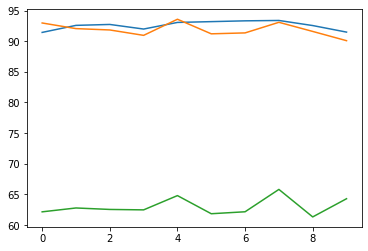

In [ ]:
fig = plt.figure()
plt.plot(range(len(bin_avg(a))), bin_avg(a))
plt.plot(range(len(bin_avg(a))), bin_avg(b))
plt.plot(range(len(bin_avg(a))), bin_avg(c))
fig.savefig("graphs.png")